In [74]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('merged_data.csv')
df = df.drop(columns=['시점'])
df.head(), df.shape, df['지역별'].unique()


(  지역별  저출산율  고용률  학생수  사설학원수  사교육참여율  수술인원  인터넷이용률  근로시간  어린이집  이동인구수  인구밀집도  \
 0  강원  1.60  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN    NaN    NaN   
 1  경기  1.63  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN    NaN    NaN   
 2  경남  1.59  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN    NaN    NaN   
 3  경북  1.58  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN    NaN    NaN   
 4  광주  1.64  NaN  NaN    NaN     NaN   NaN     NaN   NaN   NaN    NaN    NaN   
 
   주택유형별 주택규모별  ratio  
 0   NaN   NaN    NaN  
 1   NaN   NaN    NaN  
 2   NaN   NaN    NaN  
 3   NaN   NaN    NaN  
 4   NaN   NaN    NaN  ,
 (9990, 15),
 array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
        '인천', '전남', '전북', '제주', '충남', '충북', '경상', '충청', '광역시', '대도시외',
        '세종특별자치시', '전라'], dtype=object))

In [75]:
# 결측치
# df.isnull().sum()
df_copy = df.dropna()
df_copy.isnull().sum()

# df_copy.head(), df_copy.shape, df_copy['지역별'].unique()

print("Original DataFrame shape:", df.shape)
print("New DataFrame shape after dropna:", df_copy.shape)
print(df_copy.dtypes)
print(df_copy.describe())

# # 데이터 저장
# df_copy.to_csv('final_merged_data.csv', index=False)

Original DataFrame shape: (9990, 15)
New DataFrame shape after dropna: (782, 15)
지역별        object
저출산율      float64
고용률       float64
학생수       float64
사설학원수     float64
사교육참여율    float64
수술인원      float64
인터넷이용률    float64
근로시간      float64
어린이집      float64
이동인구수     float64
인구밀집도     float64
주택유형별      object
주택규모별      object
ratio     float64
dtype: object
             저출산율         고용률         학생수         사설학원수      사교육참여율  \
count  782.000000  782.000000  782.000000    782.000000  782.000000   
mean     0.748645   59.729668   92.842394  14041.542199   78.357353   
std      0.124085    0.676164    5.363667    111.466732    2.905503   
min      0.590000   57.300000   86.460000  13809.000000   73.700000   
25%      0.640000   59.300000   88.265000  13980.000000   75.975000   
50%      0.730000   59.700000   90.737000  14035.000000   78.750000   
75%      0.840000   60.300000   97.570000  14098.000000   79.967000   
max      1.000000   61.000000  104.000000  14414.000000   84.300000

In [76]:
# object → int
from sklearn.preprocessing import LabelEncoder

le_disaster = LabelEncoder()
df_copy['지역별'] = le_disaster.fit_transform(df_copy['지역별'])
df_copy['주택유형별'] = le_disaster.fit_transform(df_copy['주택유형별'])
df_copy['주택규모별'] = le_disaster.fit_transform(df_copy['주택규모별'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 4226 to 8403
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     782 non-null    int32  
 1   저출산율    782 non-null    float64
 2   고용률     782 non-null    float64
 3   학생수     782 non-null    float64
 4   사설학원수   782 non-null    float64
 5   사교육참여율  782 non-null    float64
 6   수술인원    782 non-null    float64
 7   인터넷이용률  782 non-null    float64
 8   근로시간    782 non-null    float64
 9   어린이집    782 non-null    float64
 10  이동인구수   782 non-null    float64
 11  인구밀집도   782 non-null    float64
 12  주택유형별   782 non-null    int32  
 13  주택규모별   782 non-null    int32  
 14  ratio   782 non-null    float64
dtypes: float64(12), int32(3)
memory usage: 88.6 KB


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22828\2467037263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['지역별'] = le_disaster.fit_transform(df_copy['지역별'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22828\2467037263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['주택유형별'] = le_disaster.fit_transform(df_copy['주택유형별'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22828\2467037263.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [77]:
# 이상치 확인
df_copy.drop('저출산율', axis=1).boxplot(figsize=(15,5))

<Axes: >

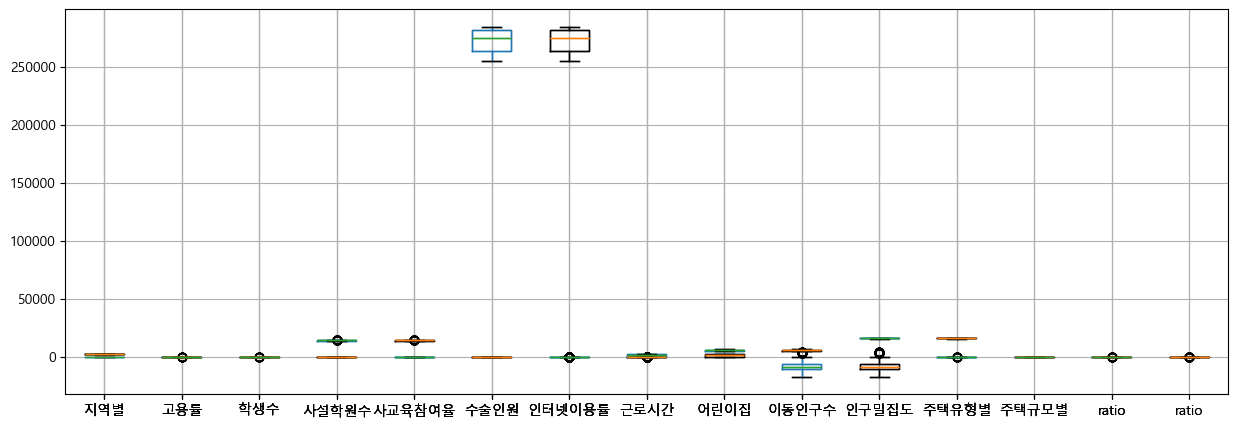

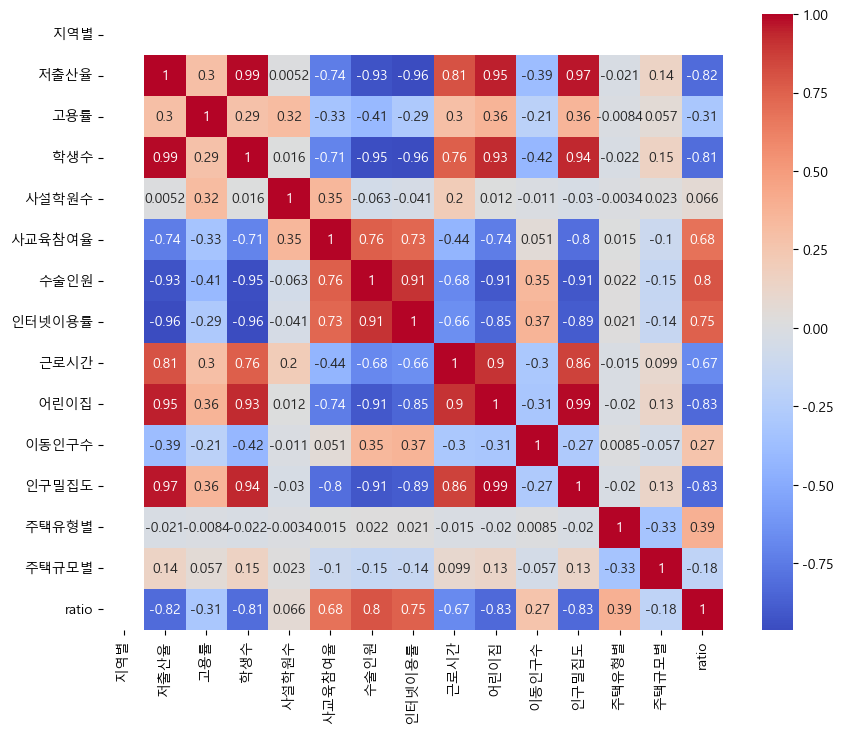

In [78]:
# 상관관계
import seaborn as sns

corr_mat = df_copy.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()

In [79]:
# 왜도 확인
df_copy.skew()

지역별       0.000000
저출산율      0.598790
고용률      -0.772841
학생수       0.661226
사설학원수     0.677659
사교육참여율    0.100203
수술인원     -0.326275
인터넷이용률   -1.118257
근로시간     -0.454196
어린이집     -0.183274
이동인구수     0.605643
인구밀집도     0.039784
주택유형별     0.446292
주택규모별     0.230485
ratio    -0.761396
dtype: float64

In [80]:
select_df = df_copy[['학생수', '사교육참여율', '인터넷이용률', '저출산율']]
select_df.head(), select_df.shape

(        학생수  사교육참여율  인터넷이용률  저출산율
 4226  104.0    74.3    86.7   1.0
 4227  104.0    74.3    86.7   1.0
 4228  104.0    74.3    86.7   1.0
 4229  104.0    74.3    86.7   1.0
 4230  104.0    74.3    86.7   1.0,
 (782, 4))

In [81]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X = select_df.drop(columns=['저출산율'])
y = select_df['저출산율']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
# 모델 훈련
# from sklearn.linear_model import LassoCV
# model = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
# model.fit(X_train_scaled, y_train)
# print(model.alpha_)

# # 훈련:97%, 테스트:97%, mse:0.0003, r2:97%
# from sklearn.linear_model import Lasso
# model = Lasso(alpha=0.01)

# # 훈련:98%, 테스트:99%, mse:0.0002, r2:98%
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# # 훈련:98%, 테스트:99%, mse:0.0002, r2:98%
# from sklearn.linear_model import Ridge
# model = Ridge(alpha=1.0)

# # 훈련:80%, 테스트:79%, mse:0.003, r2:79%
# from sklearn.linear_model import ElasticNet
# model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# # DecisionTreeRegressor = 훈련:100%, 테스트:100%, mse:2.31, r2:100%
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()

# RandomForestRegressor = 훈련:99%, 테스트:99%, mse:3.2271762208236206e-09, r2:99%
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=150)

# # GradientBoostingRegressor = 훈련:99%, 테스트:99%, mse:7.323842829433921e-08, r2:99%
# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor()

# # MLPRegressor = 훈련:62%, 테스트:66%, mse:0.005, r2:66%
# from sklearn.neural_network import MLPRegressor
# model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)

model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)

In [84]:
# 훈련 정확도
train_acc = model.score(X_train_scaled, y_train)
train_acc

0.9999999554252457

In [85]:
# 테스트 정확도
test_acc = model.score(X_test_scaled, y_test)
test_acc

0.9999998188152096

In [86]:
# MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
mse

2.8308563340488157e-09

In [87]:
# r2_score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, pred)
r2

0.9999998188152096